# Analyse Exploratoire de données - à vous de jouer !

## Importation des bibliothèques et du jeu de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ul>
<li>age = âge du patient</li>
<li>sex = sexe du patient</li>
<li>cp = type de douleur thoracique</li>
<ul>
    <li>1 : angine typique</li>
    <li>2 : angine atypique</li>
    <li>3 : douleur non angineuse</li>
    <li>4 : asymptomatique</li>
</ul>
<li>trbps = tension artérielle au repos (en mm Hg)</li>
<li>chol : cholestérol en mg/dl mesuré via BMI sensor</li>
<li>fbs : glycémie à jeun > 120 mg/dl) (1 = true; 0 = false)</li>
<li>restecg : résultats électrocardiographiques au repos</li>
<ul>
    <li>0: normal</li>
    <li>1: présentant une anomalie de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression du segment ST > 0,05 mV)</li>
    <li>2: montrant une hypertrophie ventriculaire gauche probable ou certaine selon les critères d'Estes</li>
</ul>
<li>thalach : fréquence cardiaque maximale atteinte</li>
<li>exng = exercice indiquant une angine (yes/no)</li>
<li>caa = nb de vaisseaux majeurs (0 à 3)</li>
<li>output : « moins de chance » = moins de chance de crise cardiaque « plus de chance » = plus de chance de crise cardiaque</li>
</ul><br>
Il n'y a pas d'indication pour les colonnes 'thall', 'slp' et 'oldpeak' ! Pour oldpeak (ancien pic), cela semple indiquer une valeur quantitative. Après recherche, le thalium pourrait correspondre à 'thall', nottament la technique 'Scintigraphie avec thallium'. Quid de slp ?


In [2]:
data = pd.read_csv('données_médicales.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


Il n'y pas de valeur null dans la table, pas de ligne à supprimer ou à substituer par une valeur moyennne.

In [9]:
data.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


Aucune valeur ne manque dans le dataframe => pas de traitement des valeurs non-null ou absente !

Remplacement des trois valeurs non numériques !

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:

data['sex_tr'] = LabelEncoder().fit_transform(data['sex'])
data['exng_tr'] = LabelEncoder().fit_transform(data['exng'])
data['output_tr'] = LabelEncoder().fit_transform(data['output'])

In [8]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,sex_tr,exng_tr,output_tr
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance,1,0,1
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance,1,0,1
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance,0,0,1
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance,1,0,1
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance,0,1,1


Trois nouvelles colonnes sont bien apparues, correspondant aux valeurs catégoriques transformées en valeurs numériques.

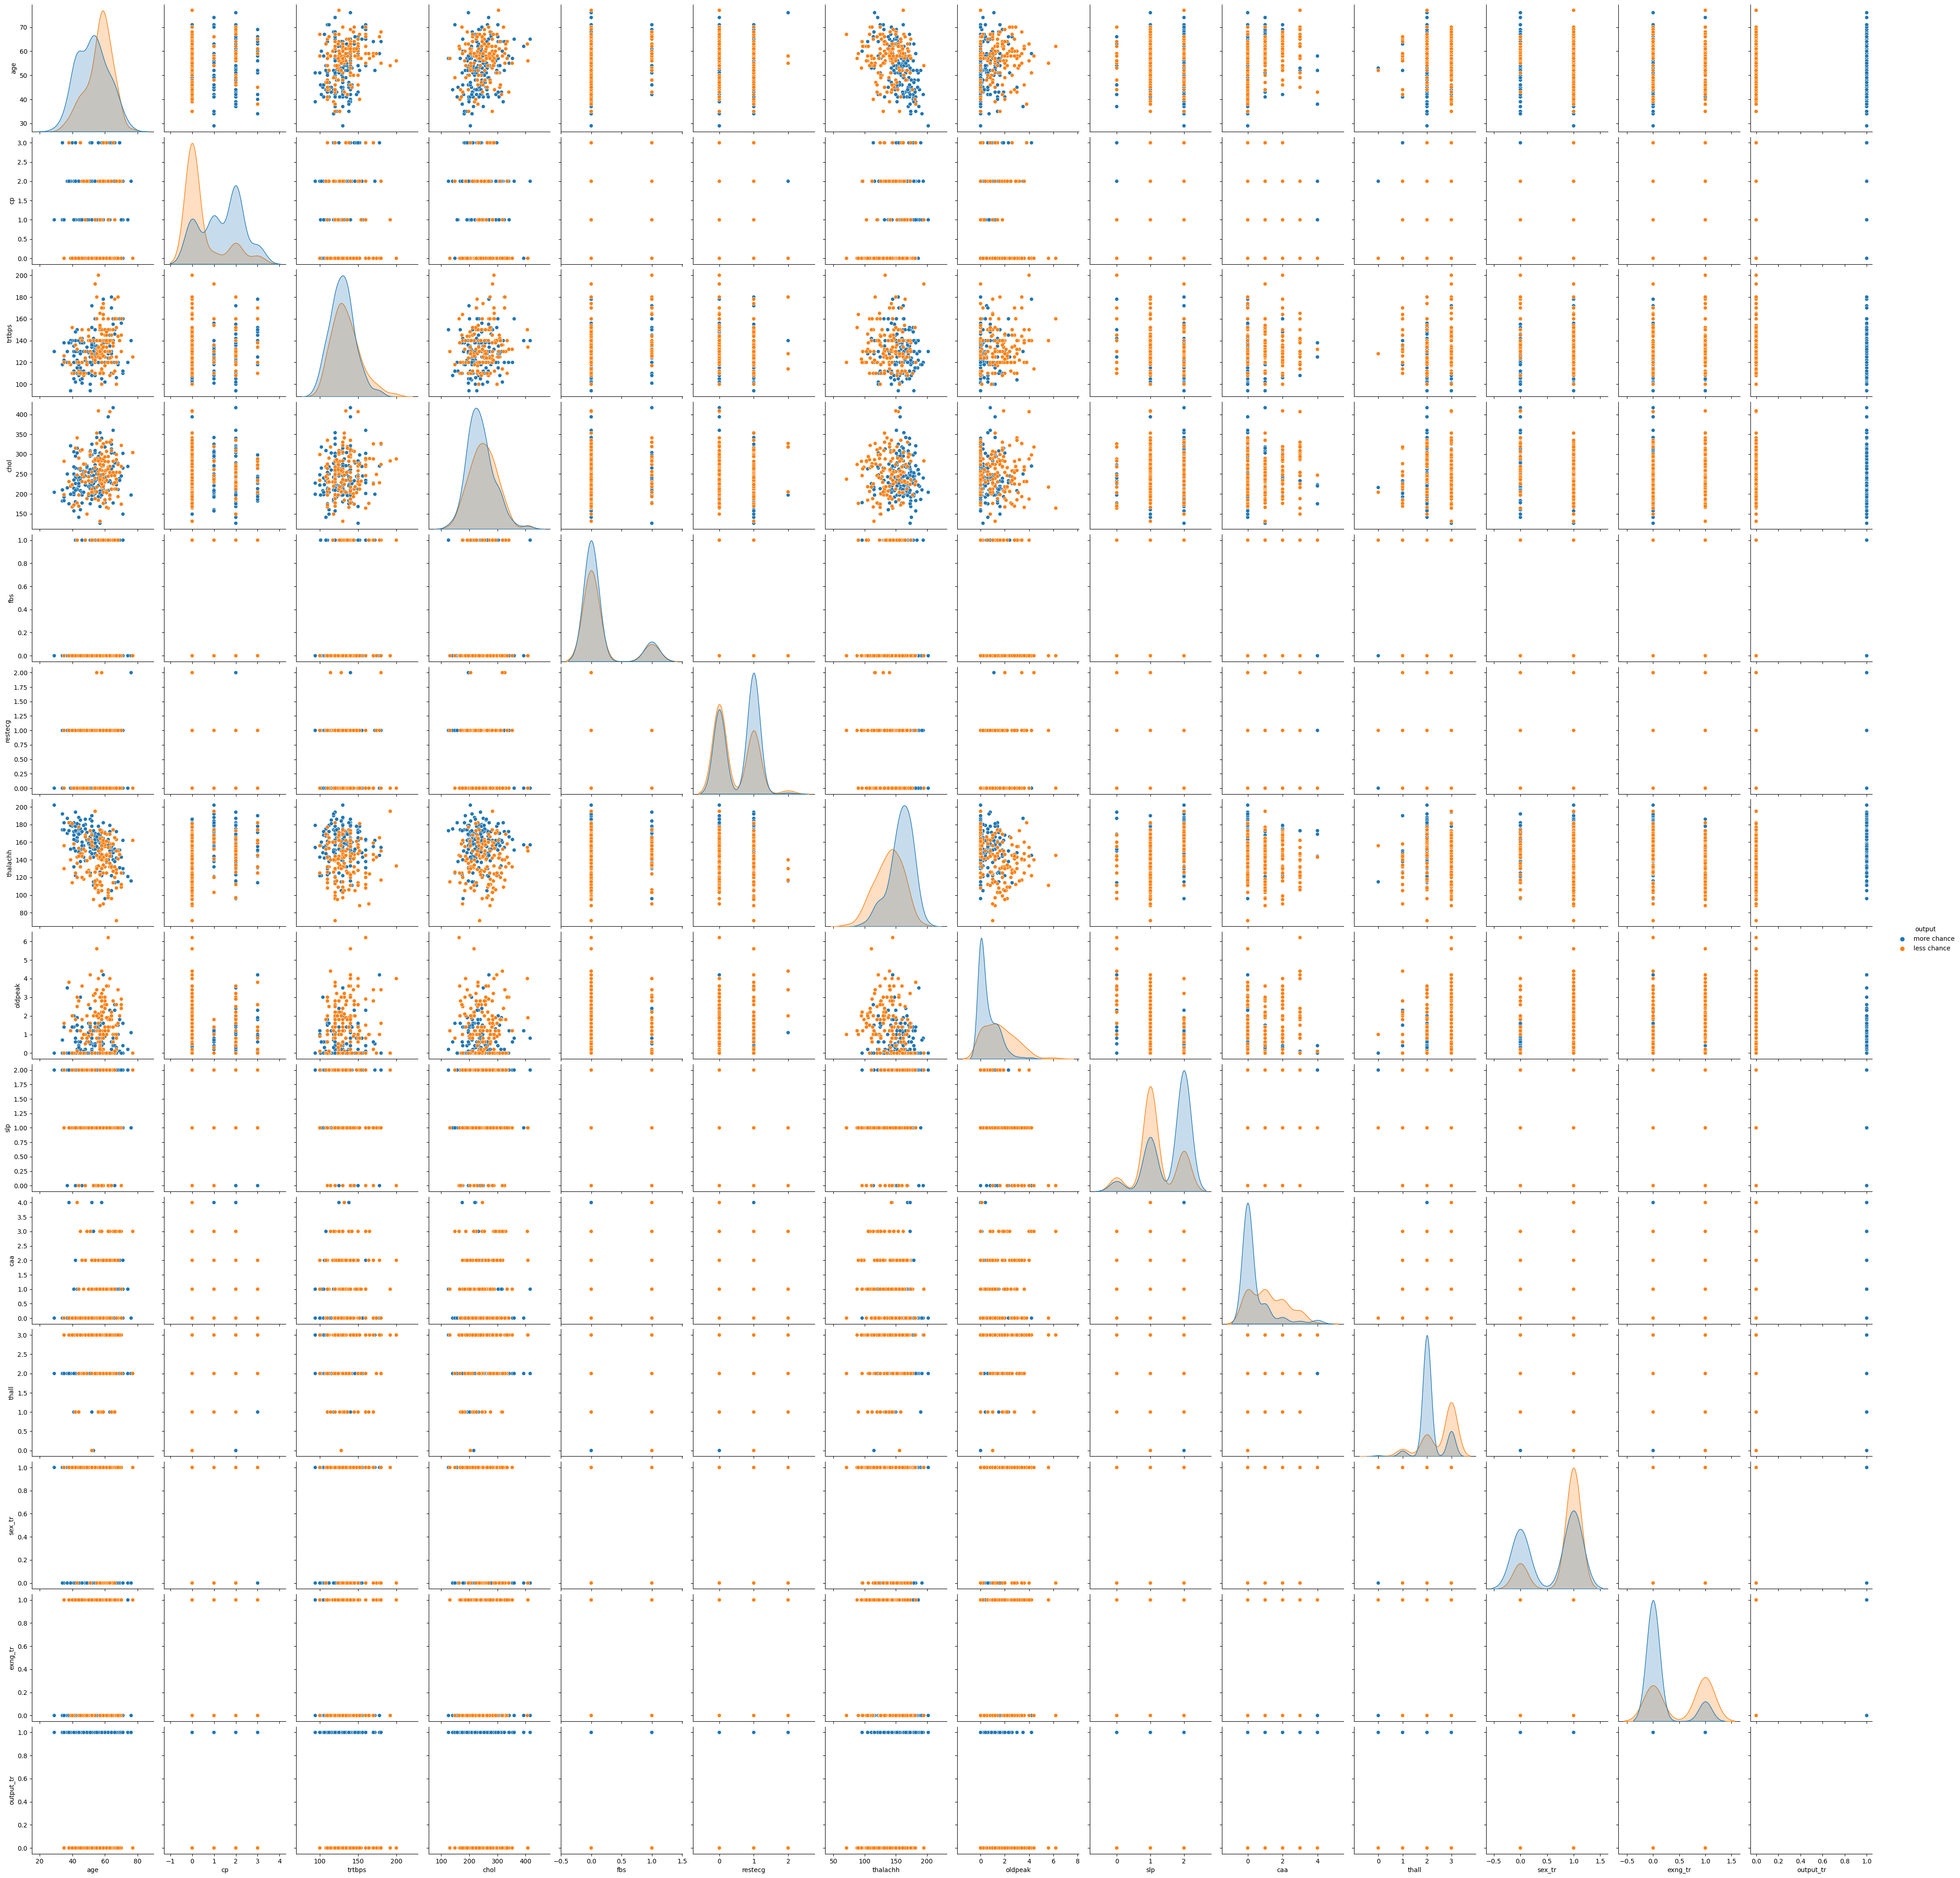

In [23]:
sns.pairplot(data=data, hue='output', height=3)

Au regard des différents graphiques, il ne semble pas que l'association de deux paramètres puissent permettre de déterminer le risque de crise cardiaque. 

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trtbps'}>,
        <AxesSubplot: title={'center': 'chol'}>],
       [<AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalachh'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>],
       [<AxesSubplot: title={'center': 'slp'}>,
        <AxesSubplot: title={'center': 'caa'}>,
        <AxesSubplot: title={'center': 'thall'}>,
        <AxesSubplot: title={'center': 'sex_tr'}>],
       [<AxesSubplot: title={'center': 'exng_tr'}>,
        <AxesSubplot: title={'center': 'output_tr'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

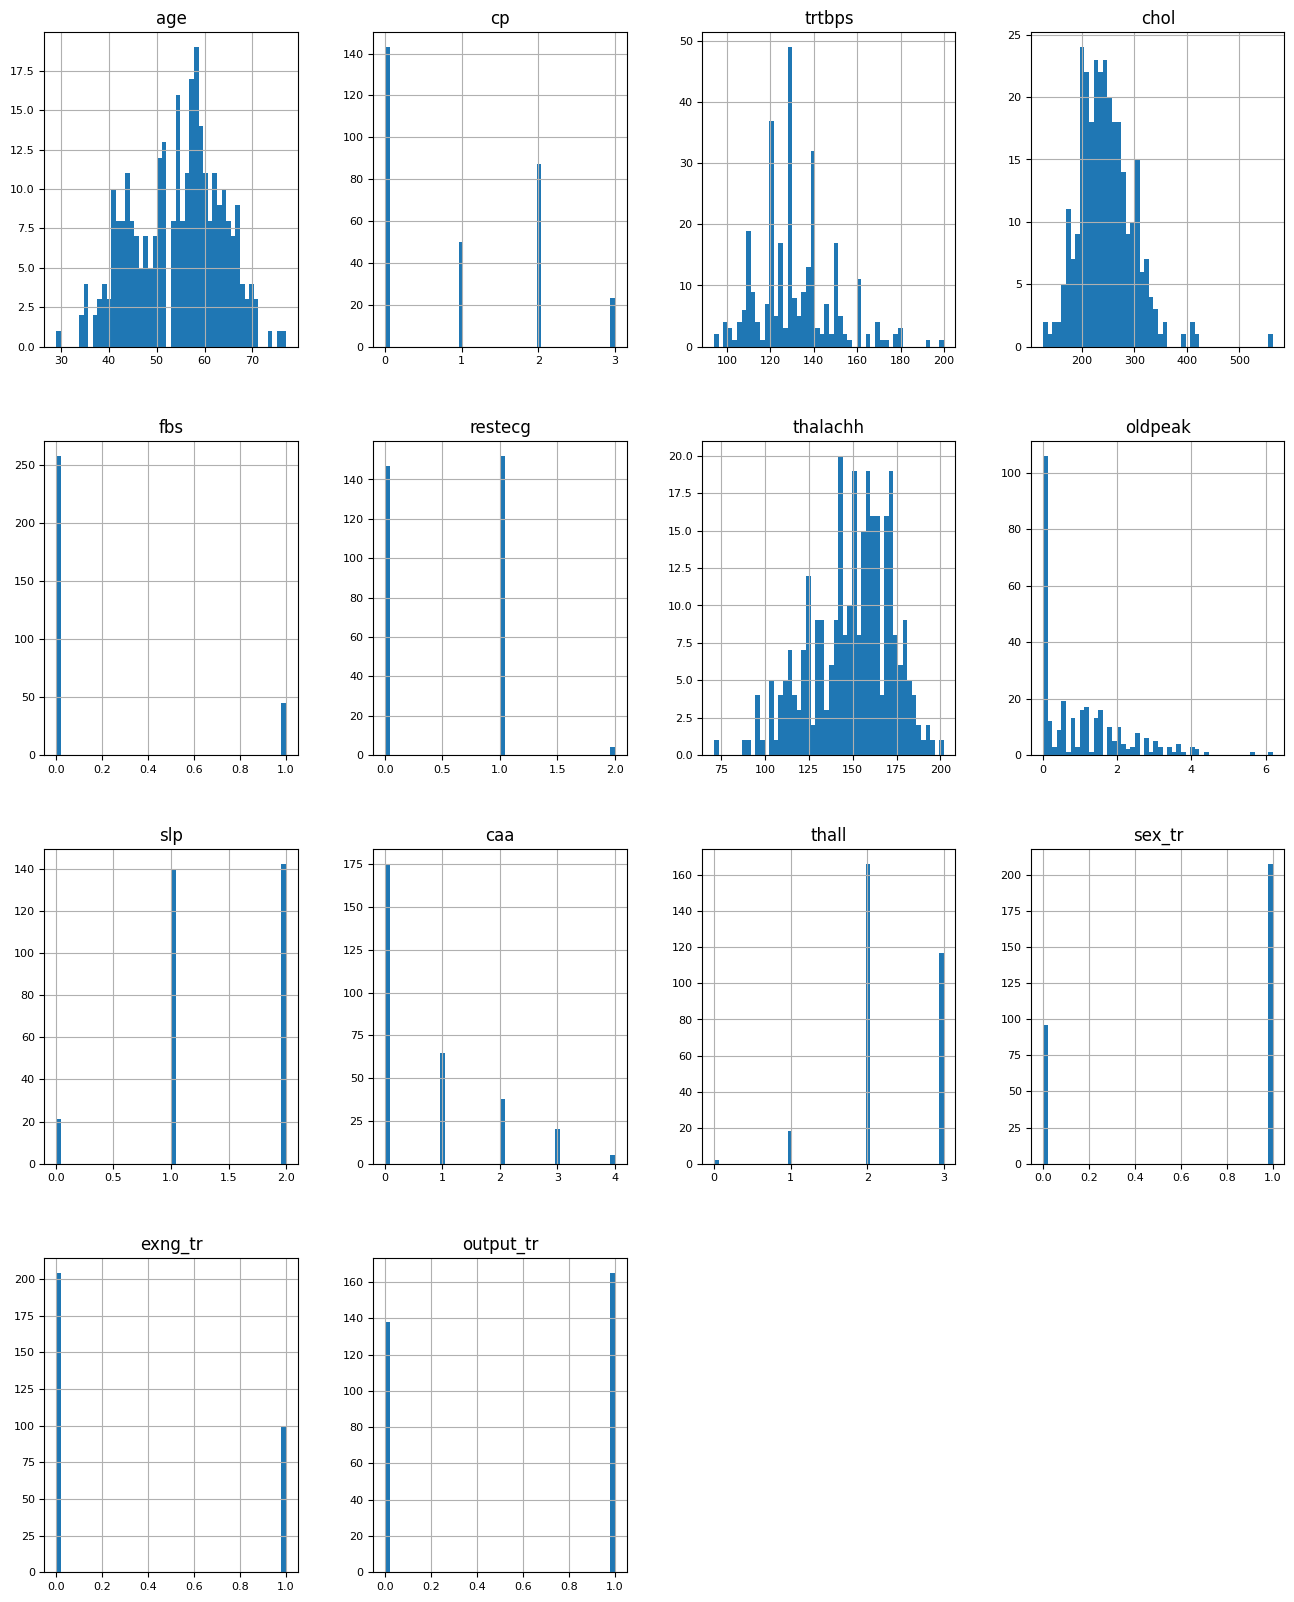

In [12]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Par l'étude des différents graphiques, on remarque la présence de valeurs abérrantes aux niveaux du cholestérol qu'il faudra supprimer. <br>
Dans la population étudiée, les femmes ne représentent un peu moins de la moitié des hommes. Car elle possède un risque plus faible de crise cardiaque ?<br>
La proportion de risque de faire ou non une crise cardiaque est assez bien répartie.


In [5]:
data.chol.max()

564

In [6]:
data.loc[data.chol==564,:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,sex_tr,exng_tr,output_tr
85,67,F,2,115,564,0,0,160,no,1.6,1,0,3,more chance,0,0,1


In [7]:
data.drop([data.index[85]], inplace= True)

In [8]:
data.chol.max()

417

La ligne contenant la valeur aberrante du cholestérol a bien été supprimée.

In [9]:
data.describe()

,age,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall,sex_tr,exng_tr,output_tr
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.324503,0.963576,131.678808,245.211921,0.149007,0.529801,149.612583,1.037748,1.400662,0.731788,2.311258,0.685430,0.327815,0.543046
std,9.067887,1.032044,17.541015,48.567877,0.356686,0.525849,22.935390,1.162552,0.616818,1.023438,0.612011,0.465115,0.470196,0.498970
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000


La proportion d'homme dans l'échantillon représente 68 %. L'âge moyen est de 54 ans, allant de 29 ans à 77 ans, l'âge médiant est quant à lui à 55 ans. 54 % des individus étudiés présentent un risque d'avoir un infactus.

In [10]:
data_corr = data.corr()['output_tr'][:-1]
features_corr = data_corr[abs(data_corr) > 0.20].sort_values(ascending = True)
print(f'''{len(features_corr)} séries présentent un taux de correlation avec la risque d'infactus supérieur à 0.20:\n{features_corr}''')

9 séries présentent un taux de correlation avec la risque d'infactus supérieur à 0.20:
exng_tr    -0.435601
oldpeak    -0.432927
caa        -0.390431
thall      -0.348641
sex_tr     -0.277867
age        -0.230720
slp         0.348569
thalachh    0.421096
cp          0.432080
Name: output_tr, dtype: float64


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_15348\857540518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()['output_tr'][:-1]


## EDA

### L'âge

[Text(0.5, 0, 'age'),
 Text(0.5, 1.0, "Risque d'infarctus en fonction de l'âge.")]

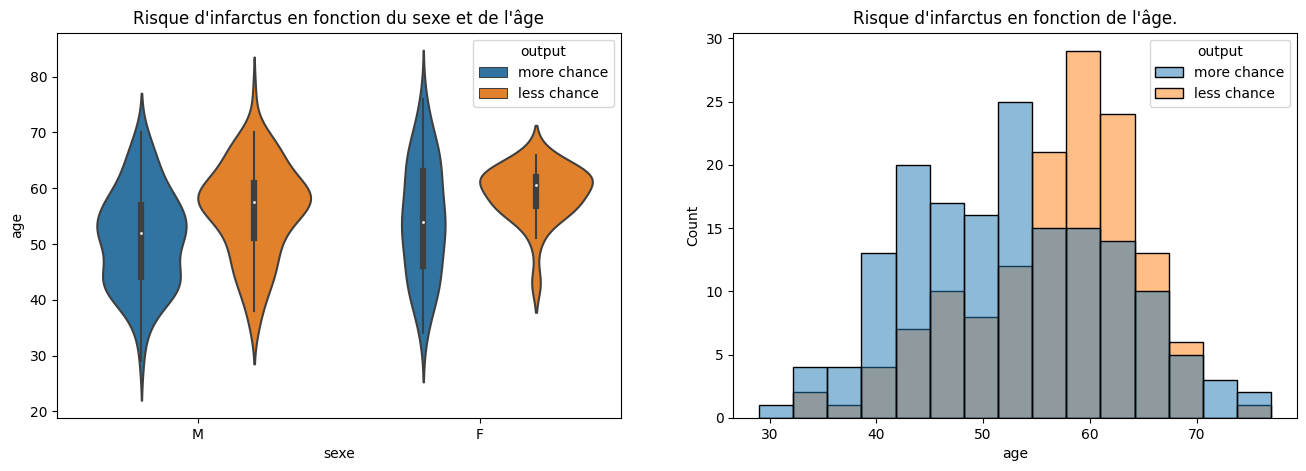

In [10]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.violinplot(x = 'sex', y ='age', hue='output', data=data, ax=ax[0])
ax[0].set(xlabel= 'sexe', ylabel='age', title="Risque d'infarctus en fonction du sexe et de l'âge")
sns.histplot(x='age', hue='output', data=data, ax=ax[1], bins= 15)
ax[1].set(xlabel='age', title="Risque d'infarctus en fonction de l'âge.")

Il apparait que le risque d'infarctus est élevé entre 30 et 55 ans, ainsi qu'après 70 ans. Alors que dans l'interval, le risque diminue. Pour les hommes, il semble que le risque d'avoir un infarctus s'inverse positivement à partir de 60 ans, avant le taux augmente. Pour les femmes, il apparait que le risque d'un infarctus est constant. Là encore, c'est autour de 60 ans que le risque semble le plus faible, mais pour les femmes, cette diminution du risque apparait plus restreinte au niveau de l'âge.

### Le sexe


[Text(0.5, 0, 'sexe'),
 Text(0.5, 1.0, "Influence du sexe en fonction du risque d'infactus")]

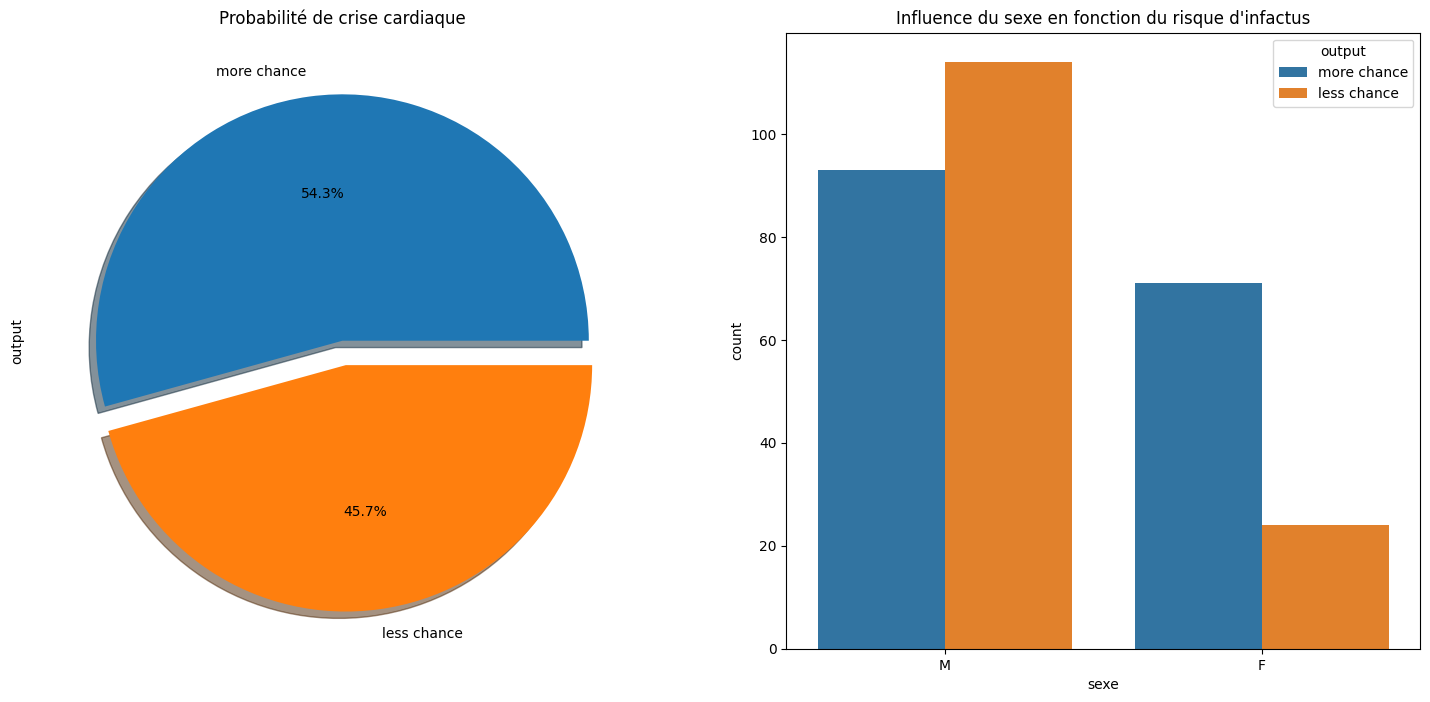

In [52]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data.output.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Probabilité de crise cardiaque')
sns.countplot(x='sex', hue='output', data=data, ax= ax[1])
ax[1].set(xlabel='sexe', title="Influence du sexe en fonction du risque d'infarctus")



Text(0.5, 1.0, 'Proportion de chaque sexes')

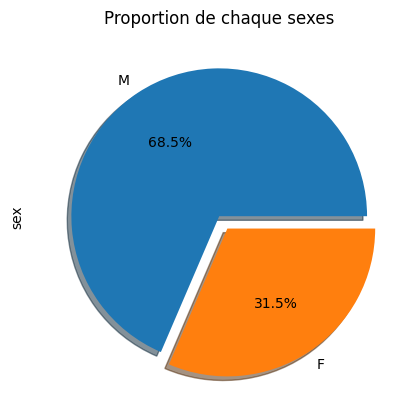

In [51]:
data.sex.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True).set_title('Proportion de chaque sexes')


Le premier graphique montre que la répartition à risque ou non est assez bien équilibré. Pour ce qui est de l'influence du sexe, nous devons prendre en compte le fait que les femmes ne représentent qu'un tier de l'échantillon.Le second graphique montre que le risque est plus élevé chez la femme que chez l'homme. C'est dernier ont une chance sur deux de ne pas avoir d'infarctus, alors que les femmes n'ont qu'une chance sur quatre.

## L'angine de poitrine

Text(0.5, 1.0, "Risque d'infactus en fonction de l'angine à l'effort et du sexe")

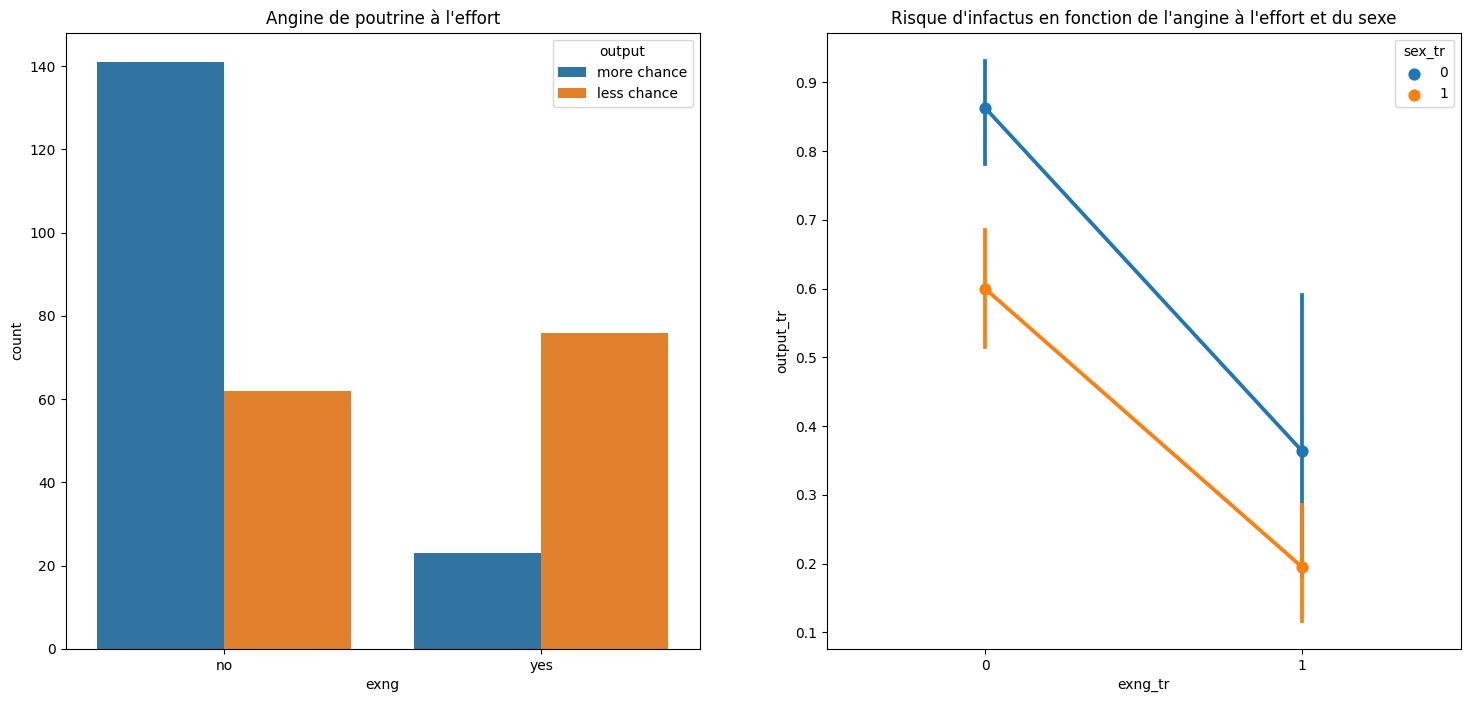

In [55]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(x='exng', hue='output', data=data, ax= ax[0])
ax[0].set_title("Angine de poutrine à l'effort")
sns.pointplot(x='exng_tr', y='output_tr', hue='sex_tr', data=data, ax=ax[1])
ax[1].set_title("Risque d'infarctus en fonction de l'angine à l'effort et du sexe")

Il apparait que ceux qui n'ont pas eut une angine de poitrine à l'effort sont plus à risque que ceux qui s'en ont eu une. Il se pourrait qu'une prise en charge soit effectué à ce moment-là, expliquant ainsi la diminuation du risque de crise cardiaque.

## Le cholestérol

Text(0.5, 0, 'taux de cholestérol')

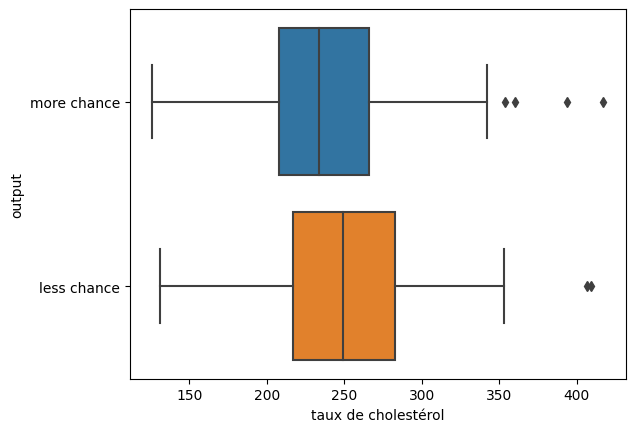

In [57]:
f = sns.boxplot(data=data, x='chol',y='output')
f.set_xlabel("taux de cholestérol")

Il apparait que le taux de cholestérol n'influence pas le risque de crise cardiaque. Néanmoins, il n'est pas précisé quel cholestérol a été mesuré !

## Douleur thoracique

[Text(0.5, 0, 'Type de douleur thoracique'),
 Text(0.5, 1.0, 'effectif par catégorie de douleur thoracique et du sexe')]

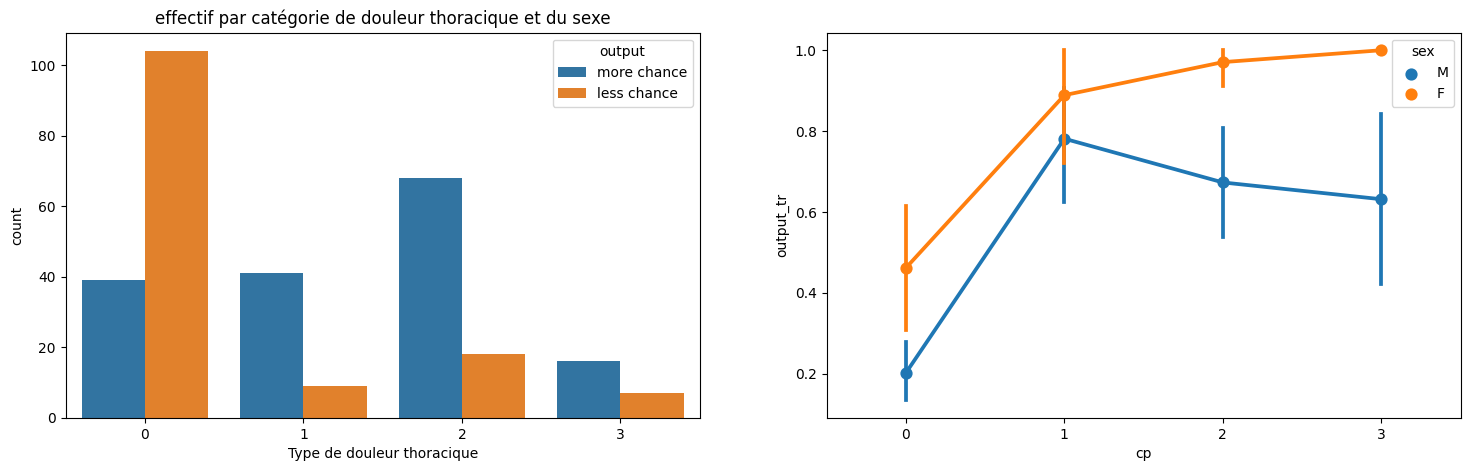

In [60]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x='cp', hue='output', data=data, ax=ax[0])
ax[0].set(xlabel='Type de douleur thoracique', title='effectif par catégorie de douleur thoracique')
sns.pointplot(x='cp', y='output_tr', hue='sex', data=data, ax=ax[1])
ax[0].set(xlabel='Type de douleur thoracique', title='effectif par catégorie de douleur thoracique et du sexe')

<li>1 : angine typique</li>
    <li>2 : angine atypique</li>
    <li>3 : douleur non angineuse</li>
    <li>4 : asymptomatique</li>

Pour une angine typique (0), la plus grande partie ont peu de chance d'avoir un infactus. Néanmoins, il existe une disparité entre les deux sexes, en effet, les femmes ont deux fois plus de chance (40%) d'avoir un infarctus. <br>

Pour une angine atypique (1), la probabilité d'avoir un infarctus est proche de la catégorie précédente, mais il est maintenant majoritaire. Par rapport au sexe, les risques sont semblables, même si les femmes restent au dessus.<br>

Pour une angine non angineuse (2), la probabilité d'avoir un infarctus augmente fortement passant de 40% à 60%. Alors que le risque des hommes diminue à 60%, celui des femmes est proche de 90%.<br>

Pour l'asymptomatique, le risque diminue et ne représente que deux fois la probablité de ne pas en avoir. Là encore, le risque pour les hommes diminuent encore légèrement (60%), alors qu'il frole les 100% dans le cas des femmes.

## Glycémie à jeun

[Text(0.5, 0, 'glycémie à jeun = 1 si >120'),
 Text(0.5, 1.0, "Risque d'infarctus en fonction de la glycémie à jeun")]

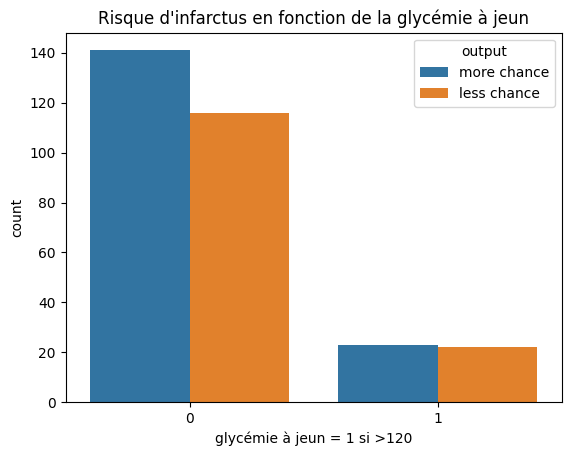

In [11]:
f = sns.countplot(x='fbs', hue='output', data=data)
f.set(xlabel = "glycémie à jeun = 1 si >120", title="Risque d'infarctus en fonction de la glycémie à jeun")

La mesure de la glycémie à jeun n'apparait pas comme un paramètre influençant le risque d'infarctus.

## Nombre de veines artérielles majeures

[Text(0.5, 0, 'Nb de veines majeurs'),
 Text(0.5, 1.0, "Risque d'infarctus en fonction du nb de vaiseeaux majeurs et du sexe")]

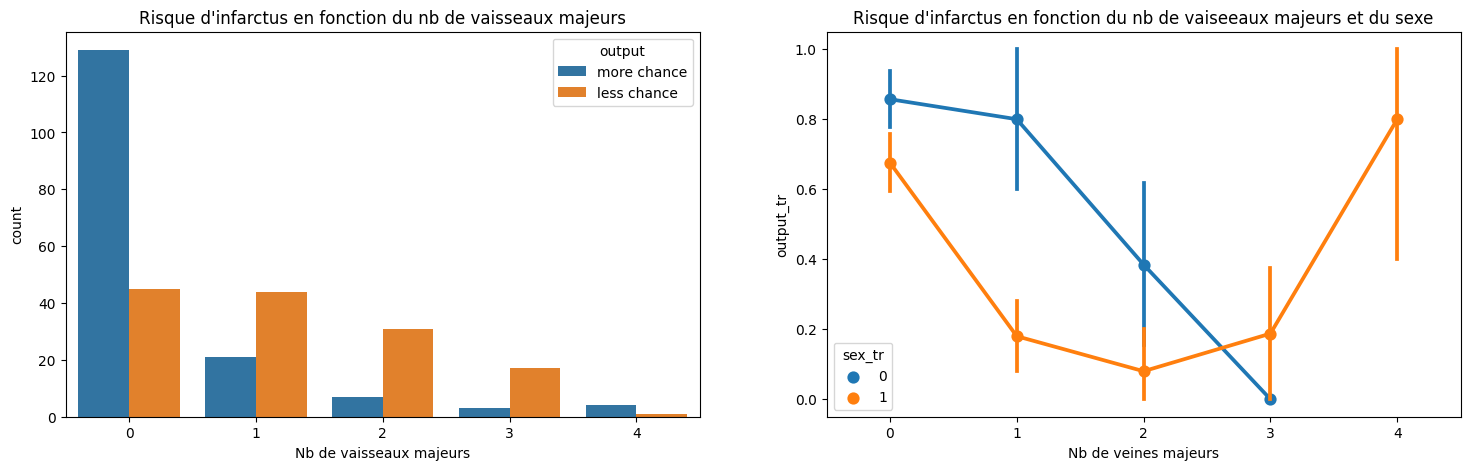

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x='caa', hue='output', data=data, ax=ax[0])
ax[0].set(xlabel='Nb de vaisseaux majeurs', title="Risque d'infarctus en fonction du nb de vaisseaux majeurs")
sns.pointplot(x='caa', y='output_tr', hue='sex_tr', data=data, ax=ax[1])
ax[1].set(xlabel='Nb de veines majeurs', title="Risque d'infarctus en fonction du nb de vaiseeaux majeurs et du sexe")

Il apparait qu'une valeur correspondant à 0 (absence ?) du nombre de vaisseaux majeures augmente significativement le risque d'un infarctus. Ainsi, pour les deux sexes, le nombre de vaisseaux majeures permet de diminuer le risque d'infarctus. Même si une augmentation est observeé pour les femmes pour les valeurs 3 et 4, les faibles proportions ne permettent pas d'en conclure quelque chose.

## Fréquence maximale cardiaque atteinte

[Text(0.5, 0, 'fréquence cardiaque max atteinte'),
 Text(0.5, 1.0, "Risque d'infactus en fonction de la fréquence cardiaque max atteinte")]

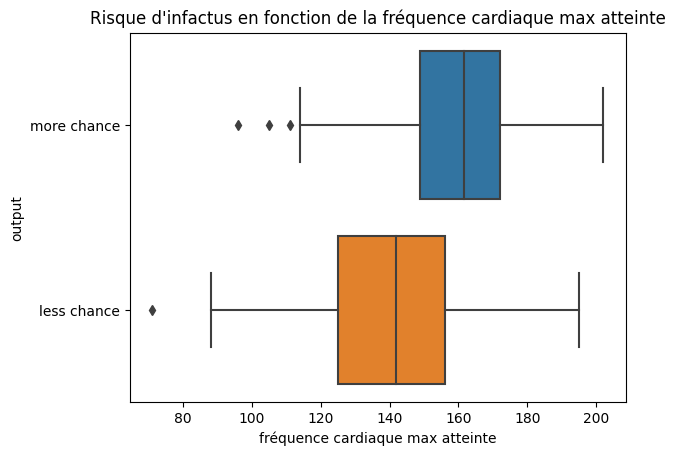

In [66]:
f = sns.boxplot(x='thalachh', y='output', data=data)
f.set(xlabel='fréquence cardiaque max atteinte', title="Risque d'infactus en fonction de la fréquence cardiaque max atteinte")

Il apparait que la fréquence cardiaque max atteinte est un facteur de risque. Néanmoins, il est à remarquer que les valeurs de deux catégories sont sur les mêmes valeurs.

### Colonne slp

[Text(0.5, 0, 'slp'),
 Text(0.5, 1.0, "Pourcentage d'infarctus en fonction de slp et du sexe")]

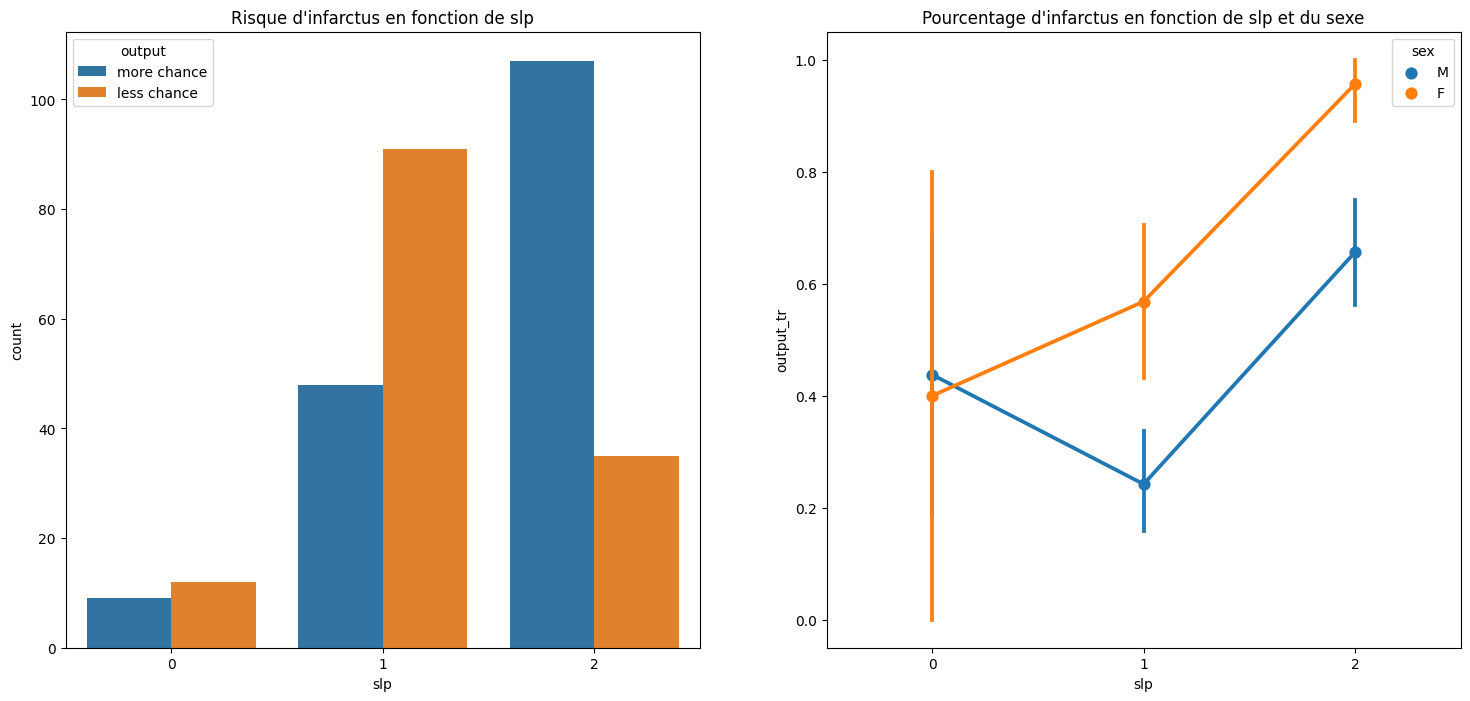

In [13]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
sns.countplot(x='slp', hue='output', data=data, ax=ax[0])
ax[0].set(xlabel='slp', title="Risque d'infarctus en fonction de slp")
sns.pointplot(x='slp', y='output_tr', hue='sex',data=data, ax=ax[1])
ax[1].set(xlabel='slp', title="Pourcentage d'infarctus en fonction de slp et du sexe")

Slp apparait comme une donnée importante dans le risque de crise cardiaque. 
- A zéro, la probabilité d'avoir ou non un infactus sont proches. Dans ce cas, le risque est identique entre les deux sexes.
- Mais dès que slp est à 1, la probabilité de ne pas en avoir est deux supérieurs au risque. Encore une fois, pour les femmes (50%), le risque est plus important que pour les hommes (20%) qui diminue même par rapport à 0.
- Tandis qu'à 2, c'est la possibilité d'avoir une crise cardiaque, avec une probabilité quatre fois supérieurs. Dans ce cas, le risque augmente pour les deux sexes, mais les femmes (près de 100%) ont toujours une probabilité plus forte de que les hommes (60%).

### Thall (Scintigraphie avec thallium ?)

[Text(0.5, 0, 'thall'),
 Text(0.5, 1.0, "Probabilité du risque d'infarctus en fonction de thall et du sexe")]

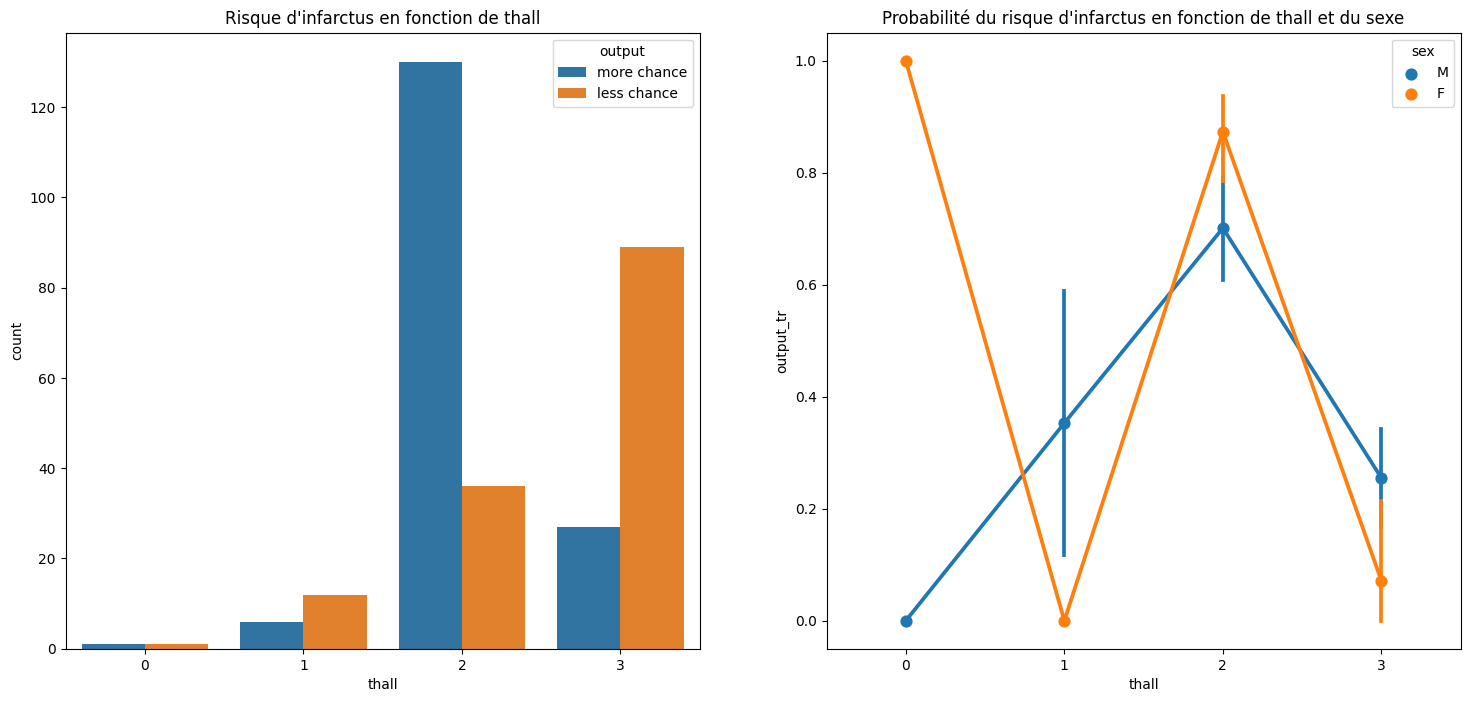

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(x='thall', hue='output', data=data, ax=ax[0])
ax[0].set(xlabel='thall', title="Risque d'infarctus en fonction de thall")
sns.pointplot(x='thall', y ='output_tr', hue='sex', data=data, ax=ax[1])
ax[1].set(xlabel='thall', title="Probabilité du risque d'infarctus en fonction de thall et du sexe")

Thall apparait comme un paramètre d'importance dans le risque de crise cardiaque.
- A zéro, le risque est faible, même s'il représente 100% dans le cas d'une femme et zéro dans le cas d'un homme.
- 1 indique une plus faible probabilité d'avoir une crise cardiaque. Pourtant, par rapport au sexe, cela présente une grande importance. Puisque le risque pour les femmes chutte à zéro, alors que celui des hommes est de 40%.
- 2 montre que le risque de crise cardiaque est 5 fois supérieurs par rapport au fait de ne pas en avoir. Par rapport au sexe, les probabilités (70 et 80%) sont assez proche, mais toujours légèrement supérieurs pour les femmes.
- 3, le risque s'inverse bénéfiquement, avec une probabilité trois supérieurs de ne pas avoir de crise cardiaque. Par rapport au sexe, les deux groupes voient leur probabilité diminué, ce coup-ci, c'est pour les hommes (20%) que le risque reste plus important que par rapport aux femmes (5%).

### Oldpeak (ancien pic)

[Text(0.5, 0, 'oldpeak'),
 Text(0.5, 1.0, "Probabilité d'infarctus en fonction de oldpeak et du sexe")]

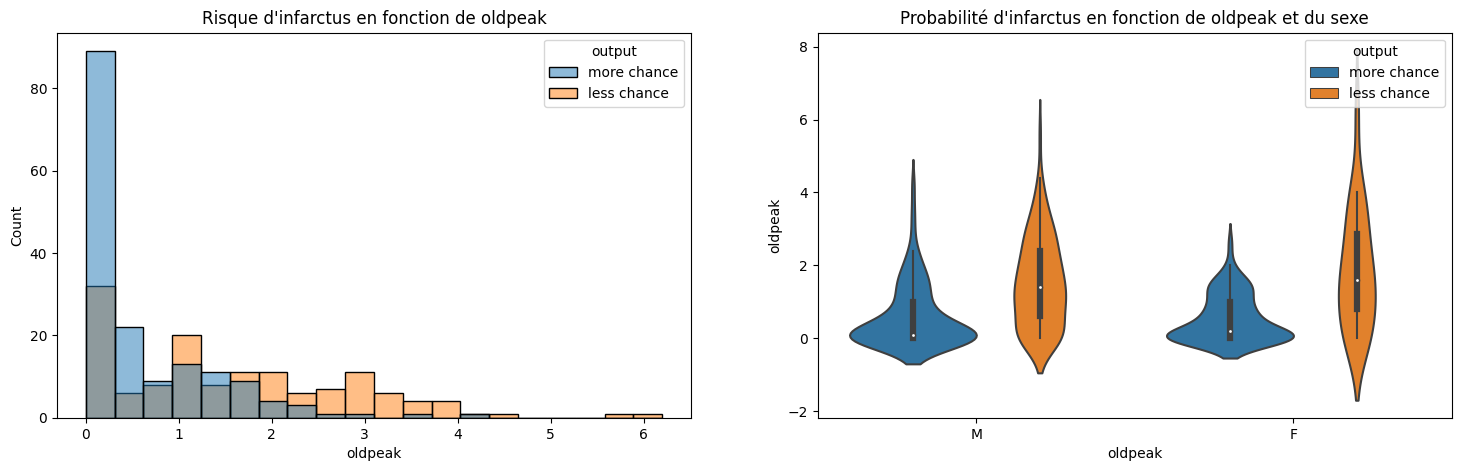

In [15]:
f, ax = plt.subplots(1 , 2, figsize=(18, 5))
sns.histplot(x='oldpeak', hue='output', data=data, bins = 20, ax= ax[0])
ax[0].set(xlabel = 'oldpeak', title = "Risque d'infarctus en fonction de oldpeak")
sns.violinplot(x='sex', y='oldpeak', hue='output', data=data, ax=ax[1])
ax[1].set(xlabel='oldpeak', title="Probabilité d'infarctus en fonction de oldpeak et du sexe")

Entre 0 et 1, il apparait que le risque d'infarctus est élevé, puis le rapport de risque s'inverse. Pour les deux sexes, un oldpeak à 0 est une facteur aggravant.

## Conclusion de l'EDA

9 paramètres apparaissent comme pertinents (sexe, age, exng, cp, caa, slp, thall, oldpeak, talachh), même si certain apparaissent graphiquement plus marquant. La proportion de femme plus faible peut faire qu'elles soient sureprésentés dans les cas à risque.

## Fractionnement du jeu de données pour l’entrainement et le test

In [125]:
data = pd.read_csv('données_médicales.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [126]:
data.drop([data.index[85]], inplace= True)

Seules les variables pertinentes sont conservés dans les features.

In [127]:
y = data.output
X = data.drop(['output', 'chol', 'trtbps', 'fbs', 'restecg'], axis=1)

In [128]:
from sklearn.model_selection import train_test_split

## Séparation du train set et du test set

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
print(X_train.shape)
print(X_test.shape)

(241, 9)
(61, 9)


## Normalisation et encodage

In [130]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [131]:
encoder_l = LabelEncoder()
y_train = encoder_l.fit_transform(y_train)
y_test = encoder_l.transform(y_test)

In [132]:
encoder_f = OrdinalEncoder()
val_qual = ['sex', 'exng']
X_train[val_qual] = encoder_f.fit_transform(X_train[val_qual])
X_test[val_qual] = encoder_f.transform(X_test[val_qual])

In [133]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [135]:
model = KNeighborsClassifier()

In [138]:
scaler_liste= [StandardScaler(),MinMaxScaler(),RobustScaler()]
for i in scaler_liste:
    X_train_scaler = i.fit_transform(X_train)
    X_test_scaler = i.transform(X_test)

    cv=StratifiedKFold()
    param_grid= {'n_neighbors': np.arange(1, 20),
    'metric':['euclidean', 'manhattan']}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = cv)
    grid.fit(X_train_scaler, y_train)
    print(grid.best_estimator_)
    model = grid.best_estimator_
    model.fit(X_train_scaler,y_train)
    print(f"{i}:",model.score(X_test_scaler,y_test))

KNeighborsClassifier(metric='manhattan', n_neighbors=18)
StandardScaler(): 0.8688524590163934
KNeighborsClassifier(metric='manhattan', n_neighbors=18)
MinMaxScaler(): 0.8524590163934426
KNeighborsClassifier(metric='manhattan', n_neighbors=19)
RobustScaler(): 0.8852459016393442


Le meilleur modèle est obtenu avec une normalisation réalisée avec RobustScaler.